In this notebook, we will train our homemade neural network on MNIST data. In the second part we will do the same(not exactly) with the Keras library. As usual let's start with the imports. I used keras for getting the *mnist* data. 

In [1]:
import numpy as np
from nn import *
from layers import Dense, Dropout, BatchNormalization
from optimizers import SGD, RMSProp, Adam
from losses import Softmax
from activations import ReLU

import matplotlib.pyplot as plt
# For mnist data
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [3]:
m, n = X_train.shape
lr = 0.01
num_iter = 10
print_verbose = 1

loss = Softmax()
optimizer = SGD(lr)
# optimizer = Adam()

model = NeuralNet(loss, optimizer)
model.add(Dense(n, 16))
model.add(ReLU())
model.add(Dense(16, 16))
model.add(ReLU())
model.add(Dense(16, 10))

Iteration : 0, Loss : 0.870919871209824
Iteration : 1, Loss : 0.3676433753425043
Iteration : 2, Loss : 0.3167127785247375
Iteration : 3, Loss : 0.29234317557266404
Iteration : 4, Loss : 0.2753571249787181
Iteration : 5, Loss : 0.26209675839360225
Iteration : 6, Loss : 0.2513403736239748
Iteration : 7, Loss : 0.24208180740927712
Iteration : 8, Loss : 0.2338290341438252
Iteration : 9, Loss : 0.22632541458384425


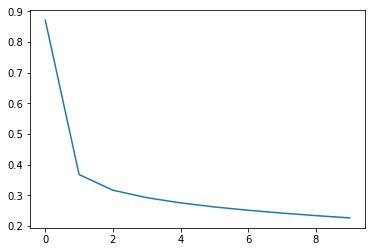

In [4]:
losses = model.train(X_train, y_train, n_iter=num_iter, print_verbose=print_verbose)
plt.plot(np.arange(num_iter), losses);

In [5]:
preds = model.predict(X_test)
(preds == y_test).mean()

0.9291

Our model achieved pretty good result ha(!), if you want, you can change the network architecture and add some more layers and get better results than me. But don't forget adding more layers will come with the cost. Also don't forget the overfitting. For now i have only implemented the Dropout for regularization, but you can add L2 regularization too as an exercise.

### Same model in Keras

In [17]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 7s 125us/step - loss: 0.5229 - acc: 0.8452
Epoch 2/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.2561 - acc: 0.9256
Epoch 3/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.2135 - acc: 0.9379
Epoch 4/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.1904 - acc: 0.9442
Epoch 5/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.1758 - acc: 0.9471


In [21]:
score = model.evaluate(X_test, y_test)

print("Test score : ", score[0])
print("Test accuracy : ", score[1])

10000/10000 [==============================] - 1s 55us/step
Test score :  0.18513718750886618
Test accuracy :  0.9467


In [22]:
history.history['loss']

[0.5229083631694317,
 0.2560997333695491,
 0.21350992750227452,
 0.19043989047209423,
 0.17576118896802267]